In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Consumer_Complaints.xlsx")
df.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [3]:
df.shape

(62516, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

In [5]:
x = df.groupby(['State'])['Complaint ID'].count()
df1 = pd.DataFrame(x)
df1.head()

,Complaint ID
State,
AK,110
AL,269
AR,266
AZ,1516
CA,13709


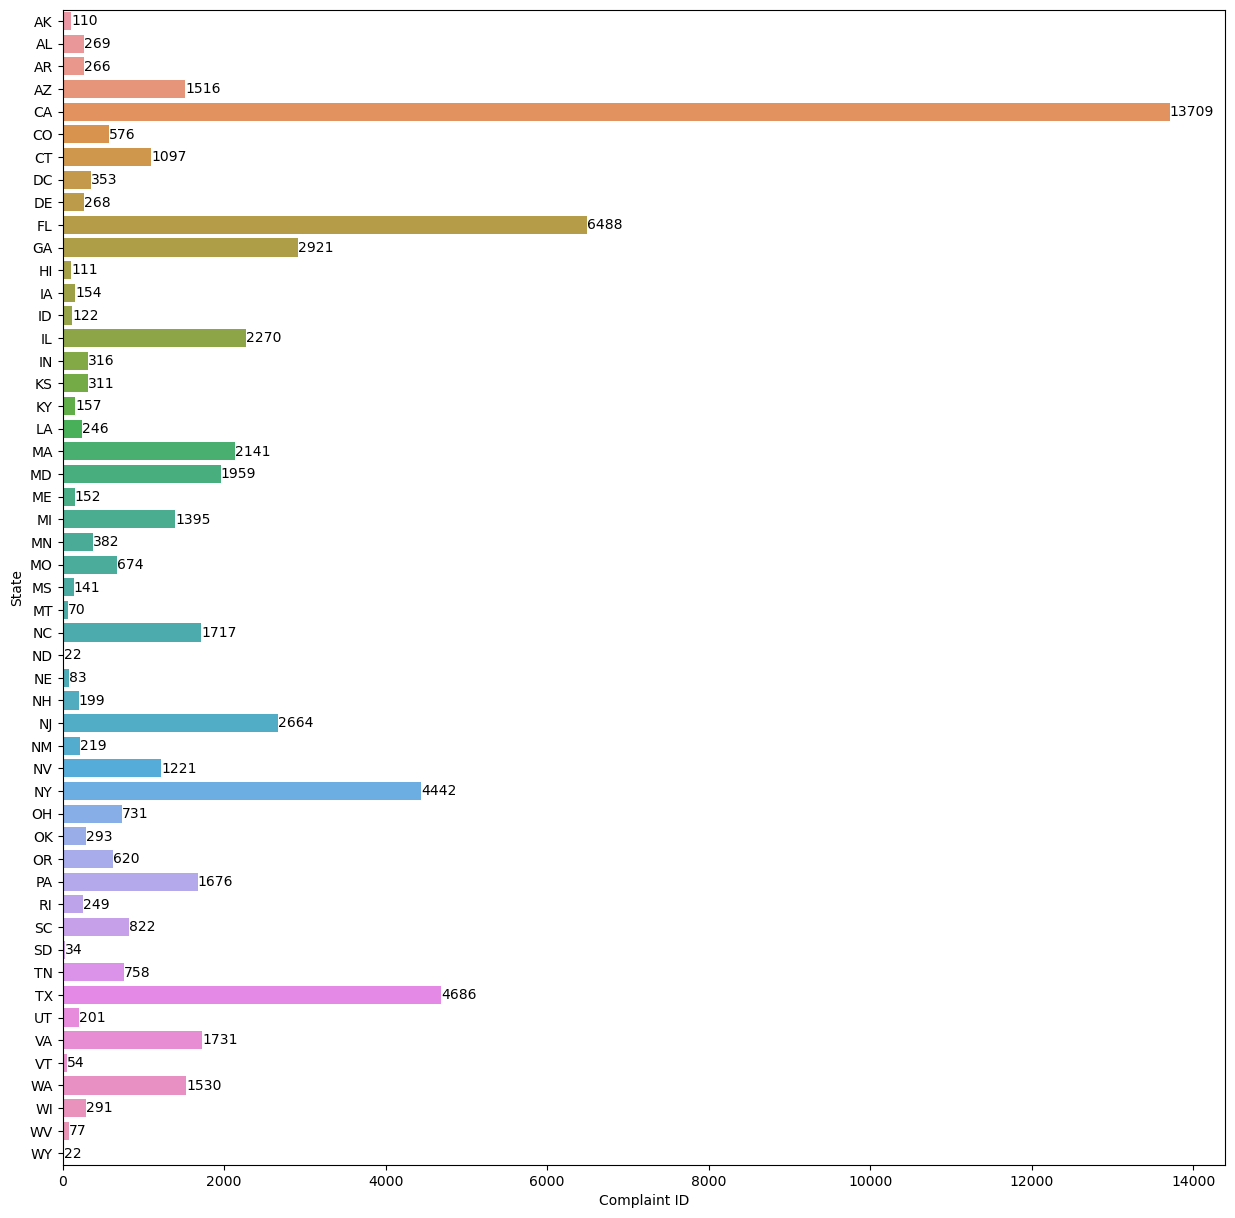

In [6]:
plt.figure(figsize=(15,15))

bplot = sns.barplot(y = df1.index, x = df1['Complaint ID']);

plt.bar_label(bplot.containers[0]);

In [7]:
# Complaints by product
# Complaints resolution category

In [8]:
df.groupby(['Product'])['Complaint ID'].count()

Product
Checking or savings account                                                     24814
Credit card or prepaid card                                                     16197
Credit reporting, credit repair services, or other personal consumer reports     7710
Debt collection                                                                  2736
Money transfer, virtual currency, or money service                               3453
Mortgage                                                                         6601
Payday loan, title loan, or personal loan                                         333
Student loan                                                                       39
Vehicle loan or lease                                                             633
Name: Complaint ID, dtype: int64

In [9]:
x = df.groupby(['Product'])['Complaint ID'].count()
df2 = pd.DataFrame(x)
df2 = df2.sort_values(by = 'Complaint ID', ascending = False)
df2

,Complaint ID
Product,
Checking or savings account,24814
Credit card or prepaid card,16197
"Credit reporting, credit repair services, or other personal consumer reports",7710
Mortgage,6601
"Money transfer, virtual currency, or money service",3453
Debt collection,2736
Vehicle loan or lease,633
"Payday loan, title loan, or personal loan",333
Student loan,39


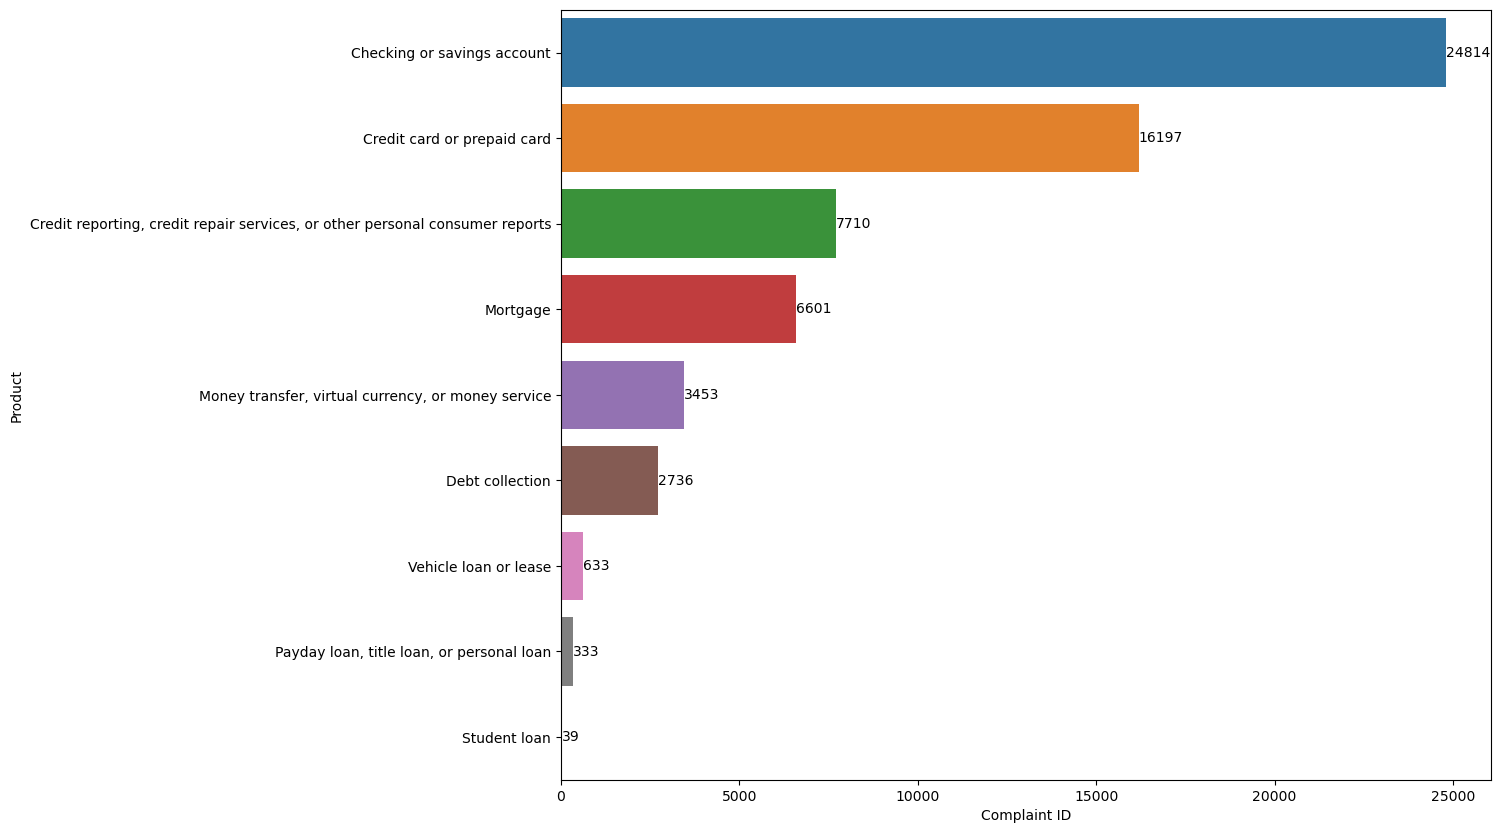

In [10]:
plt.figure(figsize=(12,10))

bplot = sns.barplot(y = df2.index, x = df2['Complaint ID']);

plt.bar_label(bplot.containers[0]);

In [11]:
df['Company response to consumer'].value_counts()

Closed with explanation            41044
Closed with monetary relief        14697
Closed with non-monetary relief     5273
In progress                         1494
Closed                                 8
Name: Company response to consumer, dtype: int64

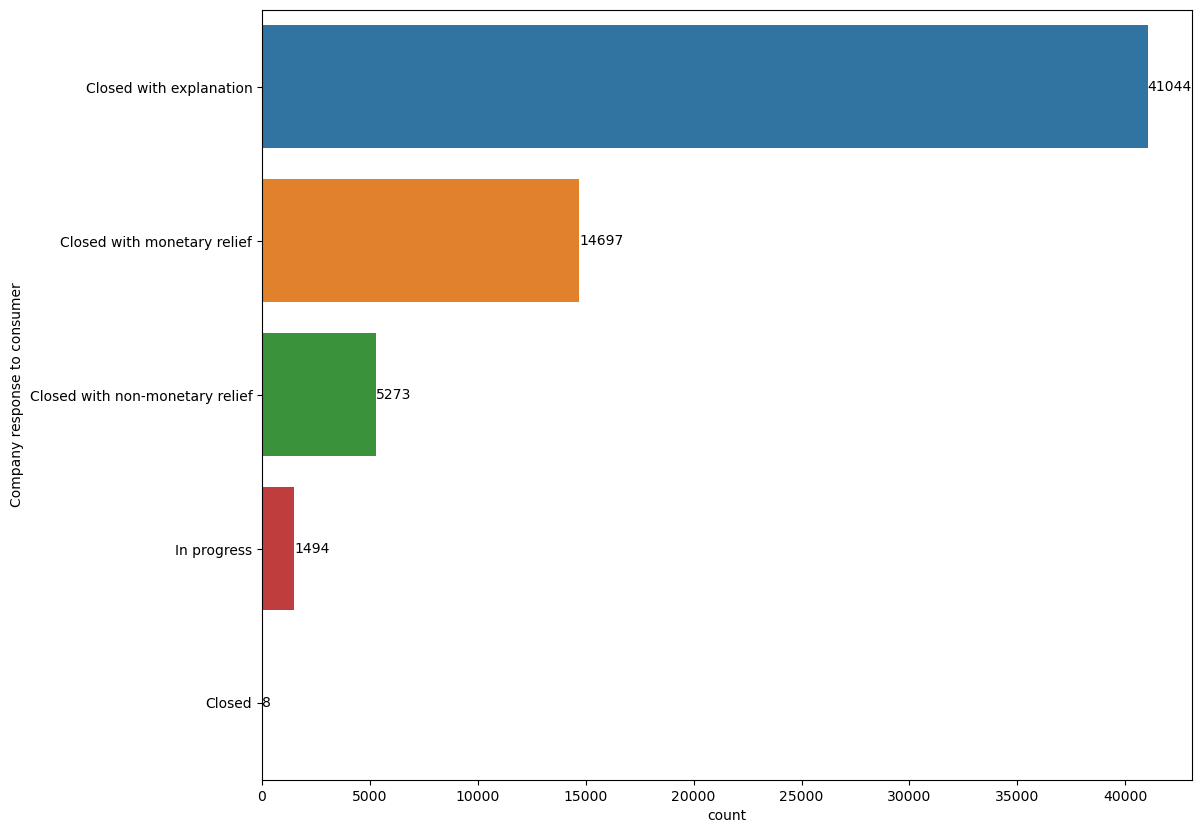

In [12]:
plt.figure(figsize=(12,10))

cplot = sns.countplot(y=df['Company response to consumer'], order = df['Company response to consumer'].value_counts().index);

plt.bar_label(cplot.containers[0]);

In [13]:
# 3 KPIs

In [14]:
# 1.

In [15]:
df['Complaint ID'].count()

62516

In [16]:
# 2.

In [17]:
df[df['Company response to consumer'] == 'In progress']

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
69,7388226,Web,2023-08-11,2023-08-11,AZ,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,In progress,NaN
94,7387569,Web,2023-08-11,2023-08-11,TX,Debt collection,I do not know,Written notification about debt,Didn't receive enough information to verify debt,NaN,In progress,NaN
105,7387966,Web,2023-08-11,2023-08-11,NJ,Checking or savings account,Checking account,Closing an account,Can't close your account,NaN,In progress,NaN
145,7312071,Web,2023-07-28,2023-07-28,MD,Checking or savings account,Checking account,Closing an account,Funds not received from closed account,NaN,In progress,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
58664,7200180,Web,2023-07-03,2023-07-03,NY,Vehicle loan or lease,Loan,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,In progress,NaN
58705,7175401,Web,2023-06-27,2023-06-27,CA,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,NaN,In progress,NaN
58780,7210770,Web,2023-07-05,2023-07-05,CA,Credit card or prepaid card,Government benefit card,Unexpected or other fees,NaN,NaN,In progress,NaN
58795,7258226,Web,2023-07-17,2023-07-17,CA,"Credit reporting, credit repair services, or o...",Other personal consumer report,Identity theft protection or other monitoring ...,Didn't receive services that were advertised,NaN,In progress,NaN


In [18]:
df_new = df.copy()
df_new.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [19]:
# Imputing the NaN values with "In Progress"
df_new['Timely response?'].fillna('In Progress', inplace = True)

df_new

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,In Progress
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [20]:
df_new['Timely response?'].value_counts()

Yes            58619
No              2403
In Progress     1494
Name: Timely response?, dtype: int64

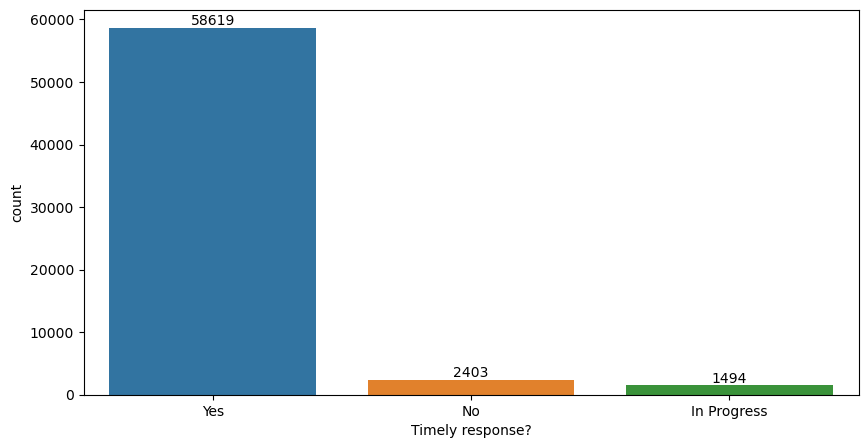

In [21]:
plt.figure(figsize=(10,5))

cplot = sns.countplot(x=df_new['Timely response?'], order = df_new['Timely response?'].value_counts().index);

plt.bar_label(cplot.containers[0]);

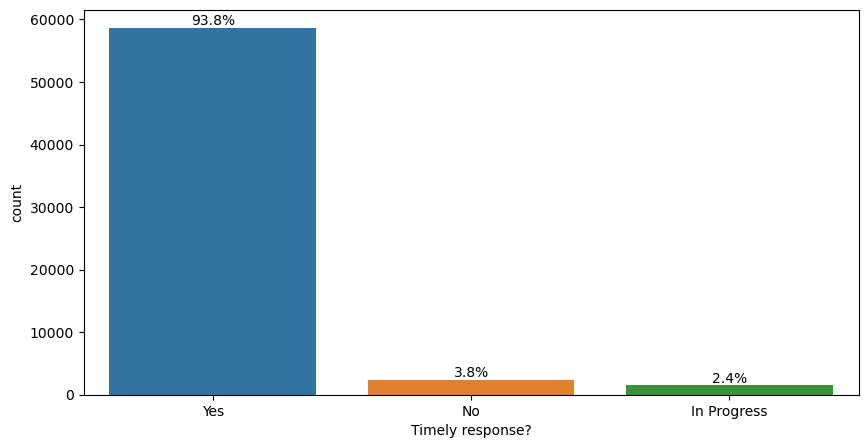

In [22]:
fig = plt.figure(figsize = (10,5))

ax = sns.countplot(x='Timely response?', data=df_new, order = df_new["Timely response?"].value_counts().index)
# get the total count of the type column
total = df_new["Timely response?"].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show()

In [23]:
# 3

In [24]:
df['Company response to consumer'].value_counts()

Closed with explanation            41044
Closed with monetary relief        14697
Closed with non-monetary relief     5273
In progress                         1494
Closed                                 8
Name: Company response to consumer, dtype: int64

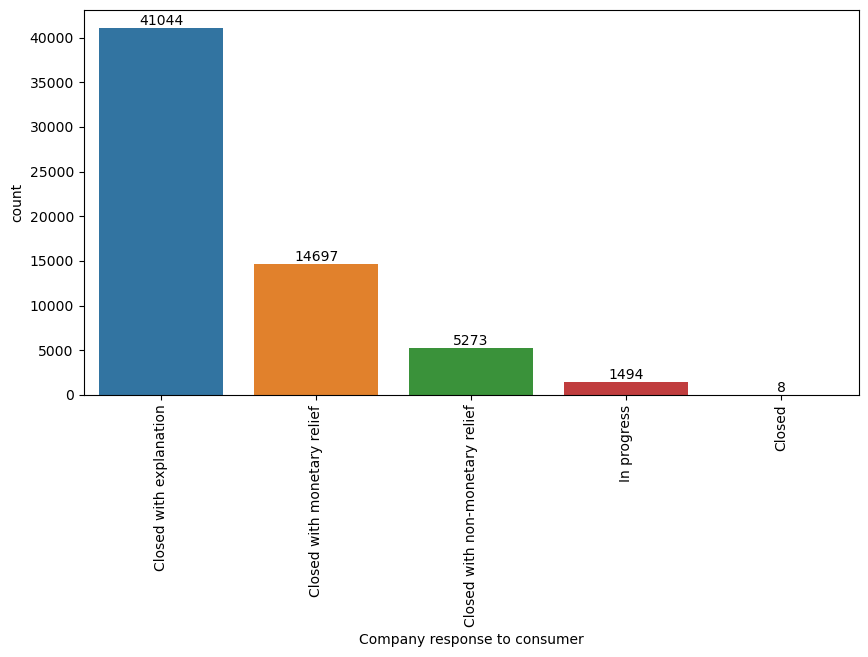

In [25]:
plt.figure(figsize=(10,5))

cplot = sns.countplot(x=df_new['Company response to consumer'], order = df_new['Company response to consumer'].value_counts().index);

plt.bar_label(cplot.containers[0]);

plt.xticks(rotation = 90);